In [245]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import linregress

In [160]:
hp_train = pd.read_csv('datasets/house_train.csv')

In [161]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
hp_train.shape

(1460, 81)

In [163]:
hp_test.shape

(1459, 80)

In [164]:
print(hp_train.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [166]:
hp_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [119]:
#hp_train = hp_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])
#hp_train = hp_train.drop(columns=['3SsnPorch','ScreenPorch','PoolArea','MiscVal','EnclosedPorch'])
#hp_train = hp_train.drop(columns=['GarageQual','GarageCond','PavedDrive'])
#hp_train = hp_train.drop(columns=['Utilities','LandSlope','Neighborhood','Condition1','Condition2'])
#hp_train = hp_train.drop(columns=['LotShape','LandContour','Street','RoofStyle','RoofMatl'])
#hp_train = hp_train.drop(columns=['CentralAir','Electrical','BsmtFinType2','BsmtFinSF2','BsmtFullBath'])
#hp_train = hp_train.drop(columns=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','Heating'])
#hp_train = hp_train.drop(columns=['LowQualFinSF','Functional','Fireplaces','KitchenAbvGr','KitchenQual'])
#hp_train = hp_train.drop(columns=['GarageType','GarageYrBlt','GarageFinish','GarageCars','SaleType','FullBath'])
#hp_train = hp_train.drop(columns=['HalfBath','BedroomAbvGr','MSZoning','FireplaceQu','HeatingQC'])
#hp_train = hp_train.drop(columns=['BsmtFinType1','BsmtHalfBath'])

In [133]:
#hp_train['LotFrontage'] = hp_train['LotFrontage'].fillna(0)
#hp_train['LotFrontage']
#hp_train = hp_train.dropna()

In [137]:
hp_train

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,65.0,8450,Inside,1Fam,2Story,7,5,2003,...,854,1710,8,548,0,61,2,2008,Normal,208500
1,2,20,80.0,9600,FR2,1Fam,1Story,6,8,1976,...,0,1262,6,460,298,0,5,2007,Normal,181500
2,3,60,68.0,11250,Inside,1Fam,2Story,7,5,2001,...,866,1786,6,608,0,42,9,2008,Normal,223500
3,4,70,60.0,9550,Corner,1Fam,2Story,7,5,1915,...,756,1717,7,642,0,35,2,2006,Abnorml,140000
4,5,60,84.0,14260,FR2,1Fam,2Story,8,5,2000,...,1053,2198,9,836,192,84,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Inside,1Fam,2Story,6,5,1999,...,694,1647,7,460,0,40,8,2007,Normal,175000
1456,1457,20,85.0,13175,Inside,1Fam,1Story,6,6,1978,...,0,2073,7,500,349,0,2,2010,Normal,210000
1457,1458,70,66.0,9042,Inside,1Fam,2Story,7,9,1941,...,1152,2340,9,252,0,60,5,2010,Normal,266500
1458,1459,20,68.0,9717,Inside,1Fam,1Story,5,6,1950,...,0,1078,5,240,366,0,4,2010,Normal,142125


In [168]:
hp_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [169]:
hp_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [197]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()

# hp_train['LotConfig'] = enc.fit(hp_train['LotConfig']).transform(hp_train['LotConfig'])
# hp_train['BldgType'] = enc.fit(hp_train['BldgType']).transform(hp_train['BldgType'])
# hp_train['HouseStyle'] = enc.fit(hp_train['HouseStyle']).transform(hp_train['HouseStyle'])
# hp_train['Exterior1st'] = enc.fit(hp_train['Exterior1st']).transform(hp_train['Exterior1st'])
# hp_train['Exterior2nd'] = enc.fit(hp_train['Exterior2nd']).transform(hp_train['Exterior2nd'])
# hp_train['MasVnrType'] = enc.fit(hp_train['MasVnrType']).transform(hp_train['MasVnrType'])
# hp_train['Foundation'] = enc.fit(hp_train['Foundation']).transform(hp_train['Foundation'])
# hp_train['SaleCondition'] = enc.fit(hp_train['SaleCondition']).transform(hp_train['SaleCondition'])

# for col in hp_train.columns:
#     if col == 'LotConfig' or 'BldgType' or 'HouseStyle' or 'Exterior1st' or 'Exterior2nd' or 'MasVnrType' 
#     or 'Foundation' or 'SaleCondition':
#         hp_train[col] = enc.fit(hp_train[col]).transform(hp_train[col])

In [170]:
hp_train['BldgType'] = enc.fit(hp_train['BldgType']).transform(hp_train['BldgType'])
hp_train['HouseStyle'] = enc.fit(hp_train['HouseStyle']).transform(hp_train['HouseStyle'])
hp_train['MSZoning'] = enc.fit(hp_train['MSZoning']).transform(hp_train['MSZoning'])

In [171]:
hp_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
# plt.scatter(df['price'],df['sqft_living'])
# sns.scatterplot(data=df, x="bmi", y="target", hue='bp')

# plt.scatter(who_data.iloc[:,1], who_data.iloc[:,8])

# income = who_data.iloc[:,1]
# alcohol = who_data.iloc[:,8]
# correlation = st.pearsonr(income, alcohol)
# print(f"r = {round(correlation[0], 2)}")

# correlation = st.pearsonr(alco, color_int)
# print(f"The r value is {round(correlation[0], 2)}. The relationship is positively correlated.")



r = -0.08


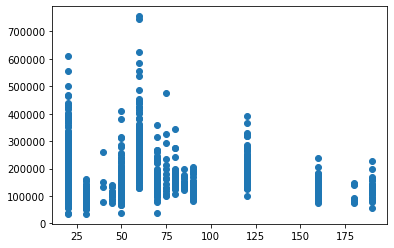

In [211]:
plt.scatter(hp_train['MSSubClass'],hp_train['SalePrice'])

MSSubClass = hp_train.loc[:,'MSSubClass']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(MSSubClass, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = -0.17


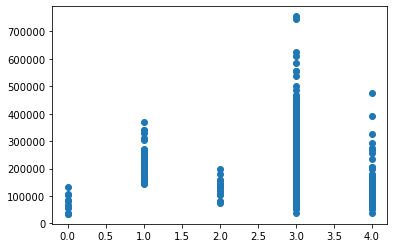

In [212]:
plt.scatter(hp_train['MSZoning'],hp_train['SalePrice'])

MSZoning = hp_train.loc[:,'MSZoning']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(MSZoning, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.26


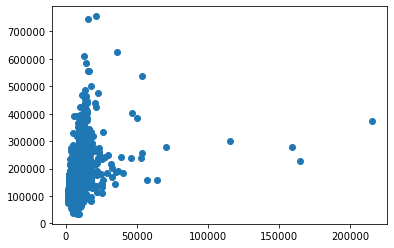

In [213]:
plt.scatter(hp_train['LotArea'],hp_train['SalePrice'])

LotArea = hp_train.loc[:,'LotArea']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(LotArea, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = -0.09


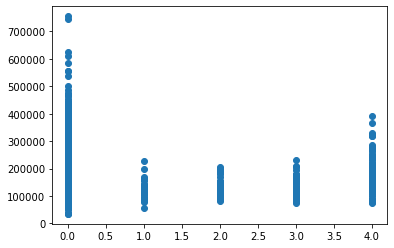

In [214]:
plt.scatter(hp_train['BldgType'],hp_train['SalePrice'])

BldgType = hp_train.loc[:,'BldgType']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(BldgType, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.18


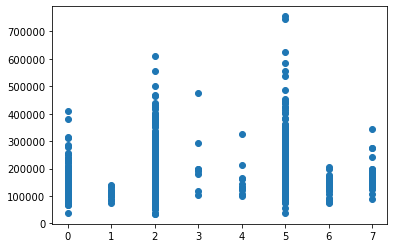

In [215]:
plt.scatter(hp_train['HouseStyle'],hp_train['SalePrice'])

HouseStyle = hp_train.loc[:,'HouseStyle']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(HouseStyle, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.79


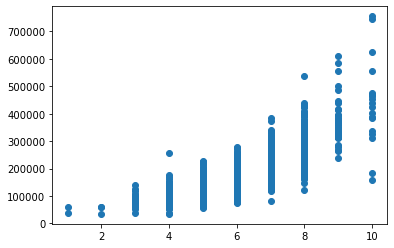

In [216]:
plt.scatter(hp_train['OverallQual'],hp_train['SalePrice'])

OverallQual = hp_train.loc[:,'OverallQual']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(OverallQual, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = -0.08


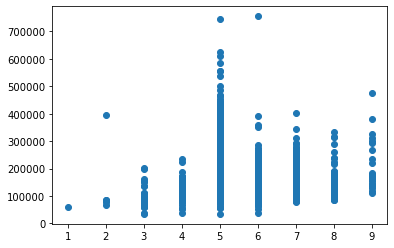

In [217]:
plt.scatter(hp_train['OverallCond'],hp_train['SalePrice'])

OverallCond = hp_train.loc[:,'OverallCond']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(OverallCond, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.52


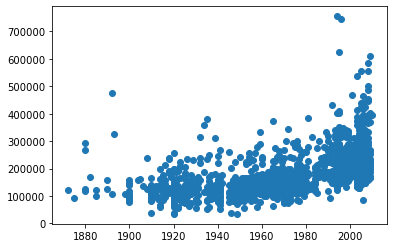

In [218]:
plt.scatter(hp_train['YearBuilt'],hp_train['SalePrice'])

YearBuilt = hp_train.loc[:,'YearBuilt']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(YearBuilt, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.61


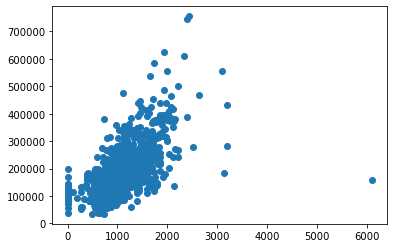

In [219]:
plt.scatter(hp_train['TotalBsmtSF'],hp_train['SalePrice'])

TotalBsmtSF = hp_train.loc[:,'TotalBsmtSF']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(TotalBsmtSF, SalePrice)
print(f"r = {round(correlation[0], 2)}")

r = 0.71


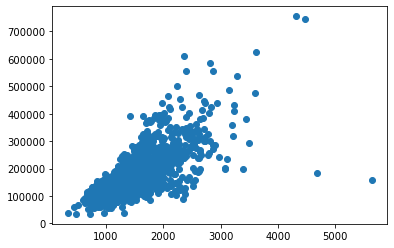

In [220]:
plt.scatter(hp_train['GrLivArea'],hp_train['SalePrice'])

GrLivArea = hp_train.loc[:,'GrLivArea']
SalePrice = hp_train.loc[:,'SalePrice']
correlation = st.pearsonr(GrLivArea, SalePrice)
print(f"r = {round(correlation[0], 2)}")

In [250]:
# x = hp_train[['MSSubClass','MSZoning','LotArea','BldgType','HouseStyle',
#               'OverallQual','OverallCond','YearBuilt','TotalBsmtSF','GrLivArea']]

In [222]:
y = hp_train[['SalePrice']]
x1 = hp_train[['LotArea','HouseStyle','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea']]

In [223]:
x1.head()

,LotArea,HouseStyle,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea
0,8450,5,7,2003,856,1710
1,9600,2,6,1976,1262,1262
2,11250,5,7,2001,920,1786
3,9550,5,7,1915,756,1717
4,14260,5,8,2000,1145,2198


In [224]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [225]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=316)

In [226]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression()

In [227]:
y_pred = regr.predict(x_test)

In [228]:
mean_squared_error(y_test, y_pred)

1551783357.459256

In [251]:
mean_squared_error(y_test, y_pred, squared=False)

39392.681521562554

In [252]:
#np.sqrt(mean_squared_error(y_test, y_pred))

In [243]:
n1 = sm.add_constant(x1)
est = sm.OLS(y, n1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     788.9
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:52:35   Log-Likelihood:                -17486.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1453   BIC:                         3.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.623e+05   8.46e+04    -11.377      

In [249]:
# (slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x1, y)
# regress_values1 = x1 * slope1 + intercept1
# line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
# plt.scatter(x_values,y_values)
# plt.plot(x1,regress_values1,"r-")
# plt.annotate(line_eq,(2010,550),fontsize=12,color="blue")
# plt.show()
# print(line_eq1)

print("Intercept: ", regr.intercept_)
print("Coefficients:")
list(zip(x1, regr.coef_))


Intercept:  [-1012966.28738433]
Coefficients:


[('LotArea',
  array([ 6.47555996e-01, -6.25062915e+02,  2.27169574e+04,  4.78150802e+02,
          2.37361872e+01,  5.44848347e+01]))]

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
vif_hp_train = pd.DataFrame()
vif_hp_train["feature"] = x1.columns
  
# calculating VIF for each feature
vif_hp_train["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]
  
print(vif_hp_train)


       feature        VIF
0      LotArea   2.377628
1   HouseStyle   4.420111
2  OverallQual  40.672468
3    YearBuilt  23.028724
4  TotalBsmtSF  11.893457
5    GrLivArea  16.733771


In [238]:
# Experiment 2
y2 = hp_train[['SalePrice']]
# x2 = hp_train[['MSSubClass','MSZoning','LotArea','BldgType','HouseStyle',
#               'OverallCond','TotalBsmtSF','GrLivArea']]
x2 = hp_train[['LotArea','HouseStyle','TotalBsmtSF','GrLivArea']]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=316)

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(x_train2, y_train2)

y_pred2 = regr2.predict(x_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
root_mse2 = mean_squared_error(y_test2, y_pred2, squared=False)

print(f"MSE for Model #2: {round(mse2,2)}")
print(f"Square Root MSE for Model #2: {round(root_mse2,2)}")


MSE for Model #2: 2478188383.37
Square Root MSE for Model #2: 49781.41


In [239]:
vif_hp_train2 = pd.DataFrame()
vif_hp_train2["feature"] = x2.columns
  
# calculating VIF for each feature
vif_hp_train2["VIF"] = [variance_inflation_factor(x2.values, i)
                          for i in range(len(x2.columns))]
  
print(vif_hp_train2)


       feature        VIF
0      LotArea   2.333703
1   HouseStyle   3.617482
2  TotalBsmtSF   7.855644
3    GrLivArea  12.111534


In [240]:
# Experiment 3
y3 = hp_train[['SalePrice']]
# x3 = hp_train[['MSSubClass','MSZoning','LotArea','BldgType','HouseStyle',
#               'TotalBsmtSF']]
x3 = hp_train[['LotArea','HouseStyle','TotalBsmtSF']]

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=316)

# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(x_train3, y_train3)

y_pred3 = regr3.predict(x_test3)

mse3 = mean_squared_error(y_test3, y_pred3)
root_mse3 = mean_squared_error(y_test3, y_pred3, squared=False)

print(f"MSE for Model #3: {round(mse3,2)}")
print(f"Square Root MSE for Model #3: {round(root_mse3,2)}")


MSE for Model #3: 3541390968.95
Square Root MSE for Model #3: 59509.59


In [241]:
vif_hp_train3 = pd.DataFrame()
vif_hp_train3["feature"] = x3.columns
  
# calculating VIF for each feature
vif_hp_train3["VIF"] = [variance_inflation_factor(x3.values, i)
                          for i in range(len(x3.columns))]
  
print(vif_hp_train3)

       feature       VIF
0      LotArea  2.226089
1   HouseStyle  2.332161
2  TotalBsmtSF  3.275142
